In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# White noise

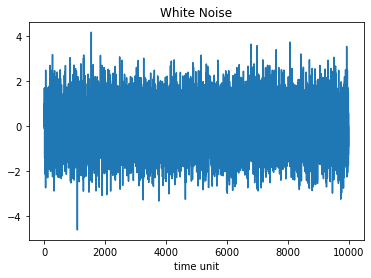

In [ ]:
T = 10000
samples = np.random.normal(size=T)

plt.plot(samples)
plt.xlabel('time unit')
plt.title('White Noise')
plt.show()

# Random walk

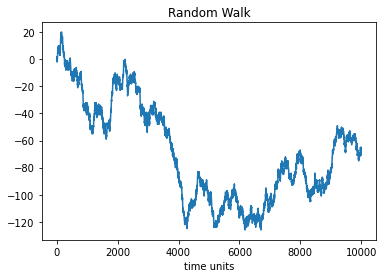

In [ ]:
y0 = 0
# Im taking an easy approach here. 
# I only allow (in a way) the gaussian white noise
# to take 3 possible values (-1,0,1). Otherwise, you
# need to use something more fancy to get the
# same plot :) 
step_set = [-1,0,1]
steps = np.random.choice(a=step_set, size=T)

# use cumsum to take into account the previous t value
# as in a random walk, i.e. y_t = y_t-1
path = np.r_[y0, steps].cumsum(0)

plt.plot(path)
plt.xlabel('time unit')
plt.title('Random Walk')
plt.show()

# Specifying Autoregressive (AR) models in `statsmodels`

The `statsmodels` package uses a general notation for ARMA (autoregressive with movig average components) models. For this course, it is suficciente to know that the general notation `statsmodels`uses is:

\begin{align}
(1-\beta L)y_t =& \epsilon \\
y_t-\beta Ly_t =& \epsilon \\
y_t =& \beta L y_{t} + \epsilon \\
\end{align}

The **lag representation** $L y_t$ is defined as $L y_t = y_{t-1}$, hence
\begin{align}
y_t =& \beta y_{t-1} + \epsilon 
\end{align}

The parameters in `statsmodels`  are specified based on the expression $(1-\beta L)$. Hence, if you want to specify that $\beta = +0.8$, for `statsmodels` it is  $\beta = -0.8$ 😲. Moreover, specifying $1$ for the moving average terms keeps the white noise term in the right. 

# AR(1)

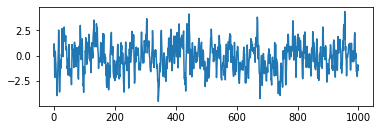

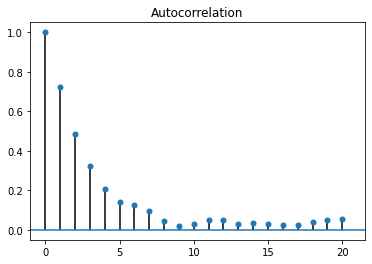

In [ ]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.8 (no intercept term)
plt.subplot(2,1,1)
ar1 = np.array([1, -0.8])
ma1 = np.array([1])
AR_1 = ArmaProcess(ar1,ma1)
ar1_data = AR_1.generate_sample(nsample=1000)
plt.plot(ar1_data)
plt.show()
plot_acf(ar1_data, alpha=1, lags=20);